In [1]:
import numpy as np
import math, os
import helper_fcns as hf
import descr_fit as dF
import autoreload
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pltSave
import seaborn as sns
sns.set(style='ticks')
% matplotlib inline

import pdb

# constants - directories
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/LGN/sach-data/';
data_name = 'sachData.npy'

In [2]:
sdp = np.load(data_loc + data_name).item()

### Some simple plotting

In [ ]:
cellNum = 31;
plt.semilogx(sdp[cellNum-1]['data']['cont'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('contrast'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

In [ ]:
cellNum = 15;
plt.semilogx(sdp[cellNum-1]['data']['sf'], sdp[cellNum-1]['data']['f0'], 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0 (sps)');
plt.title('%s' % sdp[cellNum-1]['cellType']);

In [ ]:
cellNum = 1;
plt.loglog(sdp[cellNum-1]['data']['cont'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('contrast'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

In [ ]:
cellNum = 2;
plt.loglog(sdp[cellNum-1]['data']['sf'], np.divide(sdp[cellNum-1]['data']['f0'], sdp[cellNum-1]['data']['f1']), 'o')
plt.xlabel('sf (cpd)'); plt.ylabel('f0/f1 ratio');
plt.title('%s' % sdp[cellNum-1]['cellType']);

### Now, organized plotting

Spatial frequency tuning

In [3]:
autoreload.reload(hf);

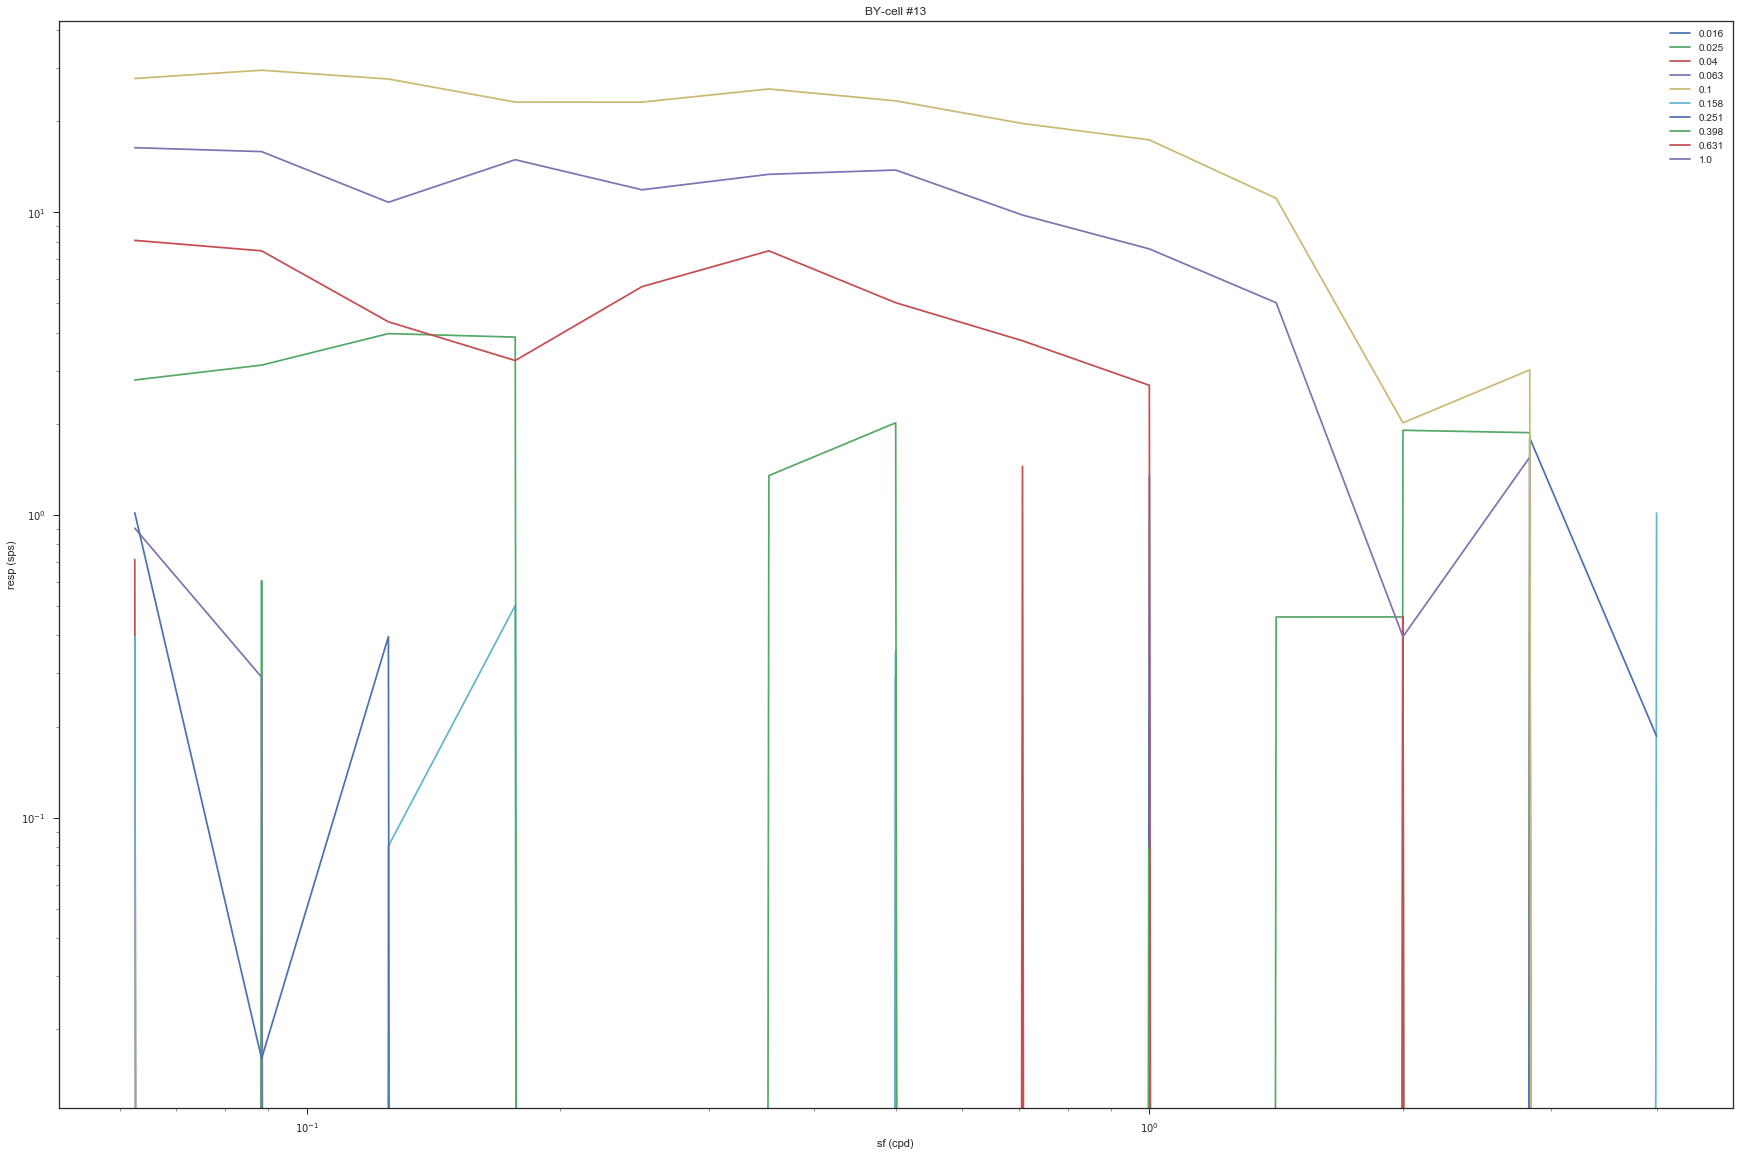

In [4]:
cellNum = 13;
data = sdp[cellNum-1]['data'];
resps, stims, respsArr = hf.tabulateResponses(data);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
for i in range(len(cons)):
#     gtThresh = np.where((f0['mean'][i, :]-baseline)>1e0)[0];
#     plt.loglog(sfs[gtThresh], f0['mean'][i, gtThresh]-baseline, '-');
    plt.loglog(sfs[sfs_gt0], f0['mean'][i, sfs_gt0]-baseline, '-');
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in cons[1:]], loc=0);

In [ ]:
sdp[0]['cellType']

Response versus contrast curves

In [ ]:
cellNum = 30;
resps, stims = hf.tabulateResponses(sdp[cellNum-1]['data']);

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(10, 10))
for i in range(len(sfs)):
    plt.loglog(cons, f0['mean'][:, i]-baseline, '-');
#     plt.errorbar(cons, f0['mean'][:, i], f0['sem'][:, i], fmt='-');
    plt.xscale('log')
    plt.yscale('log')

plt.xlabel('con (%)');
plt.xlabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend([str(np.round(x, 3)) for x in sfs], loc=0);

In [19]:
dogFit = np.load('sach-data/descrFits_sach.npy', encoding='latin1').item()
flexFit = np.load('sach-data/dFitsFlex.npy', encoding='latin1').item()

In [20]:
len(dogFit[5]['params'])

11

In [29]:
sfRef = 3;

oct_spread = 1.25
low = np.power(2, np.log2(sfRef)-oct_spread)
high = np.power(2, np.log2(sfRef)+oct_spread)
print(np.logspace(np.log10(low), np.log10(high), 9))


octz = 0.9375;
low = np.power(2, np.log2(sfRef)-octz)
high = np.power(2, np.log2(sfRef)+octz)
print(np.logspace(np.log10(low), np.log10(high), 7))

[ 1.26134462  1.56641067  1.94525933  2.4157355   3.          3.72557344
  4.62663248  5.74561968  7.13524269]
[ 1.56641067  1.94525933  2.4157355   3.          3.72557344  4.62663248
  5.74561968]


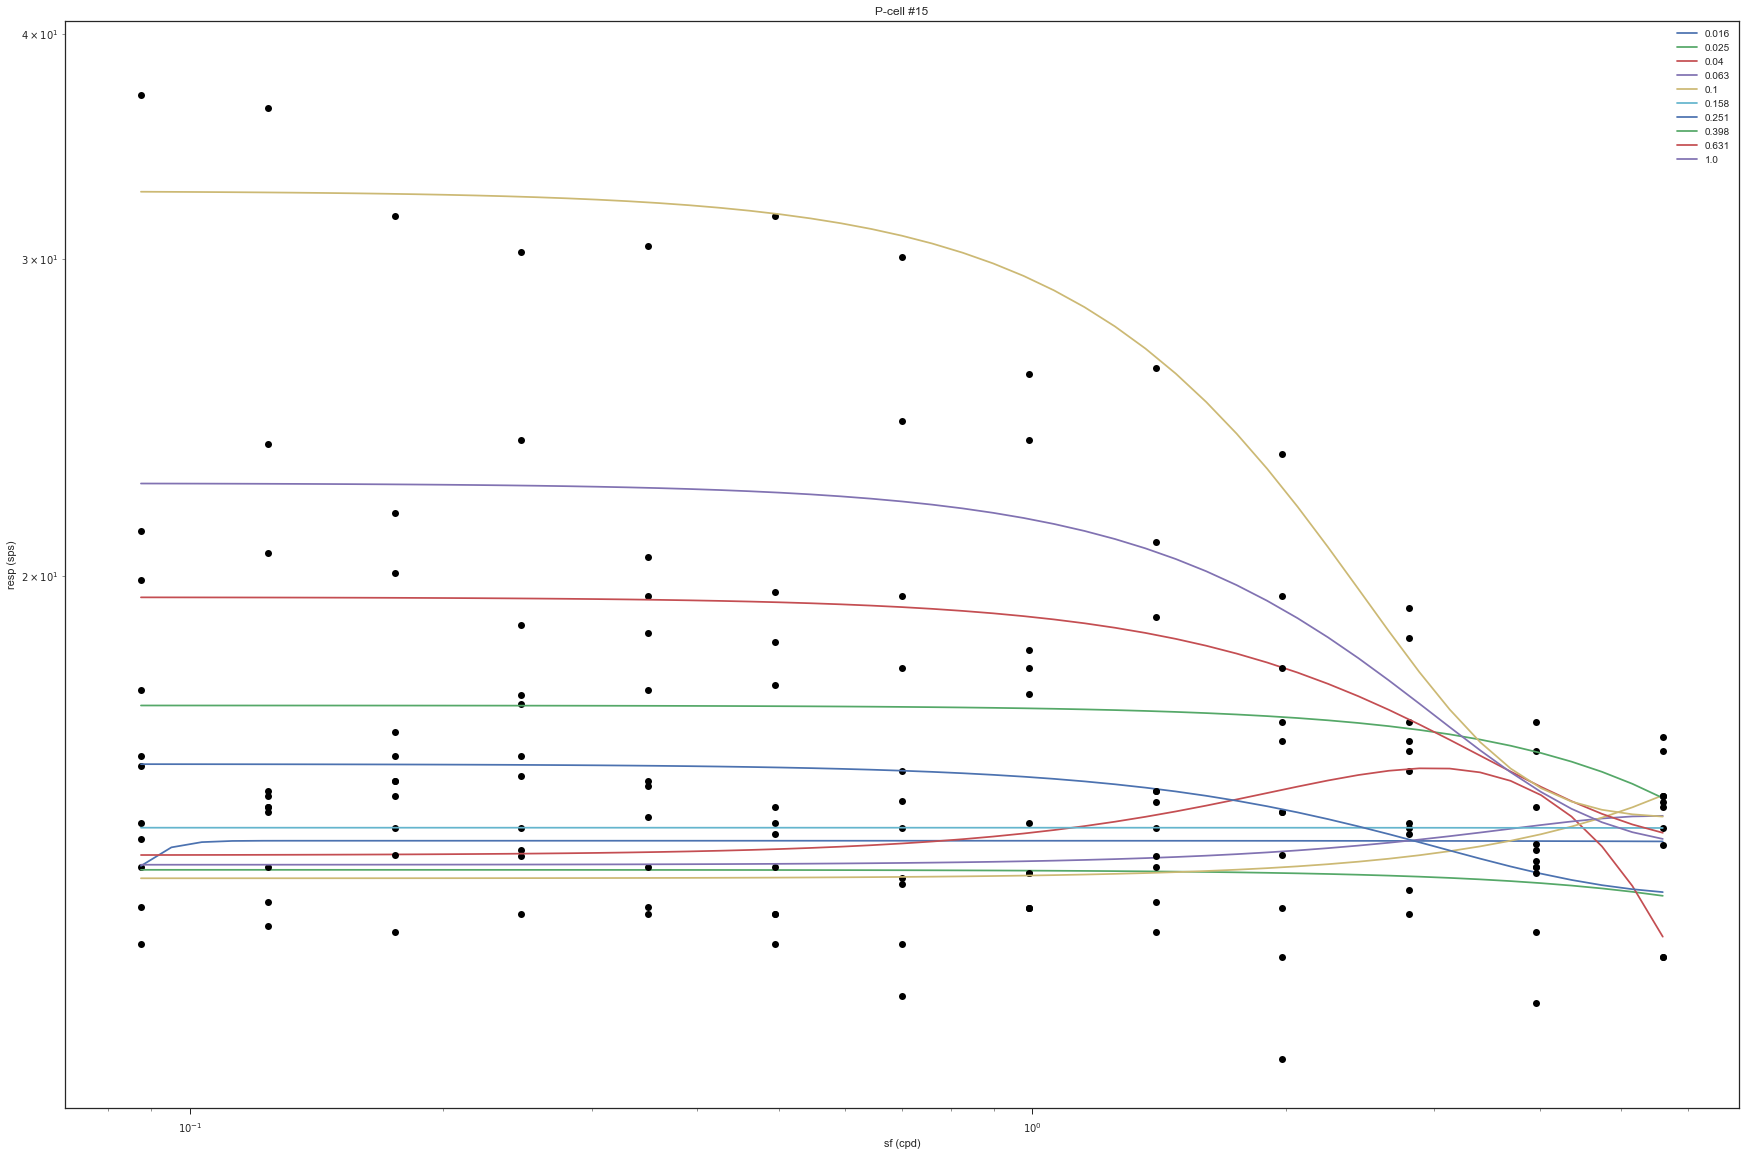

In [21]:
cellNum = 15;
data = sdp[cellNum-1]['data'];
resps, stims, _ = hf.tabulateResponses(data);
currDescr = dogFit[cellNum-1]['params'];

base_sub = 0;

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

plotSfs = np.logspace(np.log10(np.min(sfs[sfs_gt0])), np.log10(np.max(sfs[sfs_gt0])), 51)

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
lines = [];
for i in range(len(cons)):
    dataThresh = np.where((f0['mean'][i, :])>1e0)[0];
    if base_sub:
        plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh] - baseline, 'ko');
    else:
        plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh], 'ko');
    modResp, _ = np.array(hf.DiffOfGauss(*currDescr[i], plotSfs));
    curr_line = plt.loglog(plotSfs[modResp>1], modResp[modResp>1])[0];
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')
    lines.append(curr_line);

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum));
plt.legend(lines, [str(np.round(x, 3)) for x in cons[1:]], loc=0);

In [ ]:
cellNum = 12;
data = sdp[cellNum-1]['data'];
resps, stims, respArr = hf.tabulateResponses(data);
base, _ = hf.blankResp(data);
print('baseline rate is %.2f' % base)
print('mean rates with contrast are:')
for con, rate in zip(stims[0], resps[0]['mean']):
    print('con %.2f: max rate %.2f' % (con, np.max(rate)))

In [ ]:
respArr

In [ ]:
cellNum = 4;
data = sdp[cellNum-1]['data'];
resps, stims, _ = hf.tabulateResponses(data);
currDescr = descrFit[cellNum-1]['params'];

f0 = resps[0];
f1 = resps[1];

cons = stims[0];
sfs = stims[1];
sfs_gt0 = np.where(sfs>0)[0];

plotSfs = np.logspace(np.log10(np.min(sfs[sfs_gt0])), np.log10(np.max(sfs[sfs_gt0])), 51)

baseline = hf.blankResp(data)[0];

plt.figure(figsize=(30, 20))
lines = [];
for i in range(len(cons)):
    dataThresh = np.where((f0['mean'][i, :])>1e0)[0];
    plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh], 'ko');
#     dataThresh = np.where((f0['mean'][i, :]-baseline)>1e0)[0];
#     plt.loglog(sfs[dataThresh], f0['mean'][i, dataThresh]-baseline, 'ko');
    modResp, _ = np.array(hf.DiffOfGauss(*currDescr[i], plotSfs))
    curr_line = plt.loglog(plotSfs[modResp>1], modResp[modResp>1])[0];
#     plt.errorbar(sfs, f0['mean'][i, :], f0['sem'][i, :], fmt='-');
    plt.xscale('log')
    plt.yscale('log')
    lines.append(curr_line)

plt.xlabel('sf (cpd)');
plt.ylabel('resp (sps)');
plt.title('%s #%d' % (sdp[cellNum-1]['cellType'], cellNum))
plt.legend(lines, [str(np.round(x, 3)) for x in cons[1:]], loc=0);